In [3]:
#系統警告處理工具，了解後再使用
import warnings
warnings.simplefilter('ignore')

In [46]:
#常用套件
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#機器學習套件組
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFECV

In [5]:
#深度學習套件組
#! pip install tensorflow
import tensorflow as tf

2022-12-19 17:12:36.268365: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
#子進程相關，了解後再使用
from subprocess import check_output
#print(check_output(["ls", "../03_topic"]).decode("utf8"))

In [7]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submit = pd.read_csv("gender_submission.csv")
#print(train.head())
#print(test.tail())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [8]:
#合併train跟test一起做資料處理，先增加測試集中的存活欄位
test['Survived'] = ''
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,


In [9]:
#合併
data = pd.concat([train,test] , ignore_index = True)
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [10]:
#把性別改成數值表示
train['Sex_Code'] = train['Sex'].map({'female' : 1, 'male' : 0}).astype('int')
test['Sex_Code'] = test['Sex'].map({'female' : 1, 'male' : 0}).astype('int')

In [11]:
#加入欄位：倉號代碼，空值以ZZ表示
train['Cnum'] = train['Cabin'].str.slice(0,1)
train['Cnum'] = train['Cnum'].fillna('ZZ')
train['Cnum'] = train['Cnum'].replace('T','ZZ')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Code,Cnum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,ZZ
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,ZZ
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,ZZ


In [12]:
print(set(test['Cabin'].str.slice(0,1)))
print(set(train['Cabin'].str.slice(0,1)))

{nan, 'E', 'B', 'D', 'C', 'A', 'G', 'F'}
{nan, 'E', 'B', 'D', 'C', 'A', 'T', 'G', 'F'}


In [13]:
#檢查異常值Ｔ，因為已經調整掉了，所以找不到了，這應該是紀錄錯誤，因為根本沒有Ｔ甲板
train[train['Cnum'] == '00']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Code,Cnum


In [14]:
#加入欄位：親人數量、是否有親人
train['Fnum'] = train['SibSp'] + train['Parch']
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Code,Cnum,Fnum
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0,ZZ,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1,B,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,1,ZZ,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0,ZZ,0


In [15]:
#加入欄位：親人數量、是否有親人
train['FYN'] = train['Fnum'].apply(lambda x: min(x,1))
np.sum(train[(train['FYN'] == 0)])
#用sum確認計算正確

PassengerId                                               245946
Survived                                                     163
Pclass                                                      1289
Name           Heikkinen, Miss. LainaAllen, Mr. William Henry...
Sex            femalemalemalemalefemalemalefemalefemalemalefe...
Age                                                      13017.0
SibSp                                                          0
Parch                                                          0
Ticket         STON/O2. 310128237345033087717463113783A/5. 21...
Fare                                                  11407.3238
Sex_Code                                                     126
Cnum           ZZZZZZECZZZZZZZZZZZZDZZAZZZZZZZZZZZZZZZZZZZZZZ...
Fnum                                                           0
FYN                                                            0
dtype: object

In [45]:
#加入欄位 名字的首字母
train['InName'] = train['Name'].str.slice(0,1)
#train.head()

In [17]:
#測試條件篩選後只取區某一欄的語法
train[(train['FYN'] == 0)]['FYN']

2      0
4      0
5      0
6      0
11     0
      ..
884    0
886    0
887    0
889    0
890    0
Name: FYN, Length: 537, dtype: int64

In [18]:
#先用train資料做完
print('train size: %d, test size: %d' % (train.size, test.size))
print(train.shape[0],train.shape[1])
print(test.shape[0],test.shape[1])
print(data.shape[0],data.shape[1])

train size: 15147, test size: 5434
891 17
418 13
1309 12


In [19]:
#缺失值檢查
nans = {}
for colname in train.columns:
    nans[colname] = train[train[colname].isnull()].size
nans

{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 3009,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 11679,
 'Embarked': 34,
 'Sex_Code': 0,
 'Cnum': 0,
 'Fnum': 0,
 'FYN': 0,
 'InName': 0}

<AxesSubplot:xlabel='Pclass', ylabel='count'>

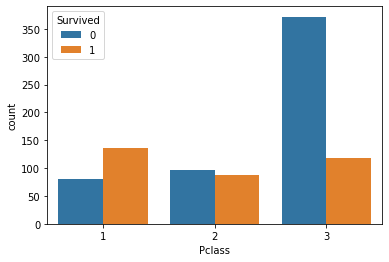

In [20]:
#艙等跟存活與否的關係
sns.countplot(train['Pclass'], hue=train['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

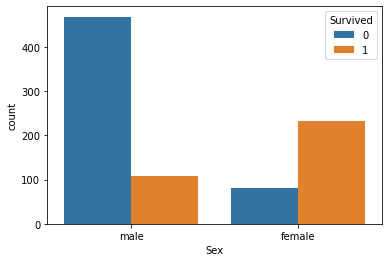

In [21]:
#性別跟存活與否的關係
sns.countplot(train['Sex'], hue=train['Survived'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

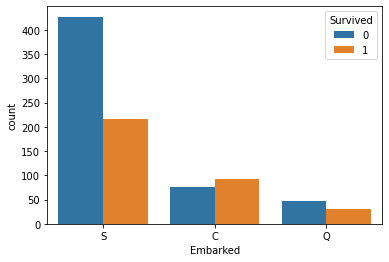

In [22]:
#登船港口
sns.countplot(train['Embarked'], hue=train['Survived'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

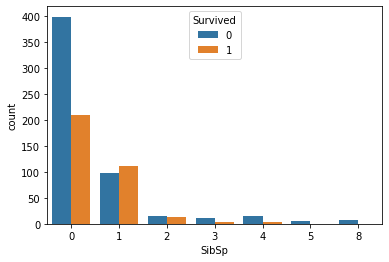

In [23]:
#兄弟姐妹
sns.countplot(train['SibSp'], hue=train['Survived'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

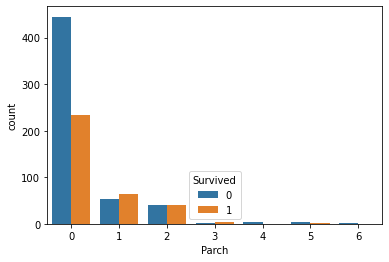

In [24]:
#父母子女
sns.countplot(train['Parch'], hue=train['Survived'])

<AxesSubplot:xlabel='Fnum', ylabel='count'>

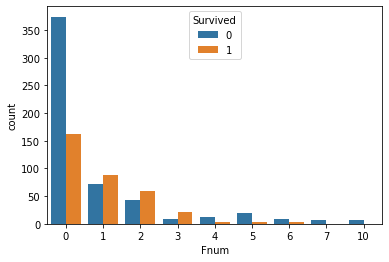

In [25]:
#家人數量
sns.countplot(train['Fnum'], hue=train['Survived'])

<AxesSubplot:xlabel='Fnum', ylabel='count'>

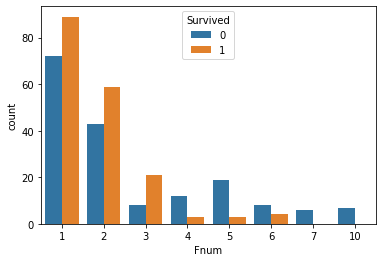

In [26]:
#家人數量(特別觀察>0結構)
sns.countplot(train[train['Fnum']>0]['Fnum'], hue=train['Survived'])

In [43]:
#加入欄位 家人數234
train['F234'] = train['Fnum'].apply(lambda x: 1 if x in [2,3,4] else 0)
#train.tail()

<AxesSubplot:xlabel='FYN', ylabel='count'>

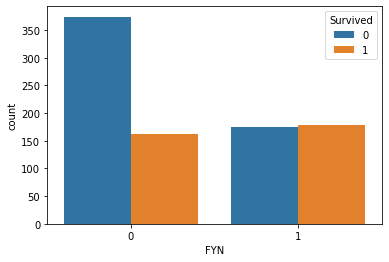

In [27]:
#### 家人上船
sns.countplot(train['FYN'], hue=train['Survived'])

In [44]:
#嘗試檢查父母子女 與 兄弟姐妹 是否有相關性
#以散佈圖檢查，但純粹用顏色深淺難以識別
#plt.scatter(train["Parch"],                    # x軸資料
#            train["SibSp"],     # y軸資料
#            c = "m",                                  # 點顏色
#            s = 50,                                   # 點大小
#            alpha = .05,                               # 透明度
#            marker = "D")                             # 點樣式

In [30]:
#對父母子女與兄弟姐妹作相關性分析，無特殊發現，作為程式碼留存
df = train[['PassengerId','Parch','SibSp'] ]
df
pvt = df.pivot_table(values='PassengerId',index='Parch', columns='SibSp',aggfunc=np.count_nonzero)
pvt = pvt/890
print(pvt)

SibSp         0         1         2         3         4         5         8
Parch                                                                      
0      0.603371  0.138202  0.017978  0.002247       NaN       NaN       NaN
1      0.042697  0.064045  0.007865  0.007865  0.010112       NaN       NaN
2      0.032584  0.021348  0.004494  0.007865  0.010112  0.005618  0.007865
3      0.001124  0.003371  0.001124       NaN       NaN       NaN       NaN
4      0.001124  0.003371       NaN       NaN       NaN       NaN       NaN
5      0.002247  0.003371       NaN       NaN       NaN       NaN       NaN
6           NaN  0.001124       NaN       NaN       NaN       NaN       NaN


<AxesSubplot:xlabel='Cnum', ylabel='count'>

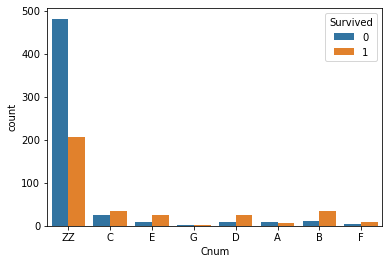

In [57]:
#艙號
sns.countplot(train['Cnum'], hue=train['Survived'])

<AxesSubplot:xlabel='Cnum', ylabel='count'>

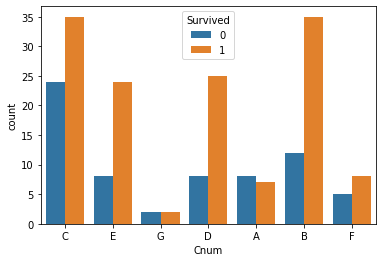

In [59]:
#艙號，特別觀察不是ＺＺ的倉號
sns.countplot(train[train['Cnum']!='ZZ']['Cnum'], hue=train['Survived'])

In [42]:
#加入欄位 倉號為ＢＣＤＥ
train['Cbcde'] = train['Cnum'].apply(lambda x: 1 if x in ['B','C','D','E'] else 0)
#train.tail()

<AxesSubplot:xlabel='InName', ylabel='count'>

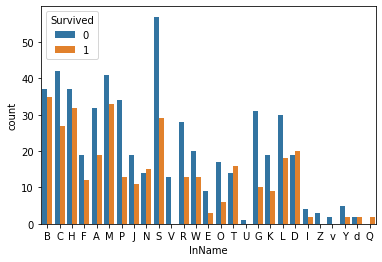

In [61]:
#姓名首字母的影響
sns.countplot(train['InName'], hue=train['Survived'])

In [41]:
mask1 = train['InName'] == 'N'
mask2 = train['InName'] == 'T'
mask3 = train['InName'] == 'D'
indata = train[mask1|mask2|mask3]
#indata.head()

In [73]:
pvt1 = indata.pivot_table(values='PassengerId',index='InName', columns='Sex',aggfunc=np.count_nonzero)
pvt2 = indata.pivot_table(values='PassengerId',index='InName', columns='Pclass',aggfunc=np.count_nonzero)
print(pvt1,'\n',pvt2)

Sex     female  male
InName              
D           12    27
N           10    19
T           13    17 
 Pclass  1  2   3
InName          
D       9  8  22
N       6  8  15
T       9  6  15


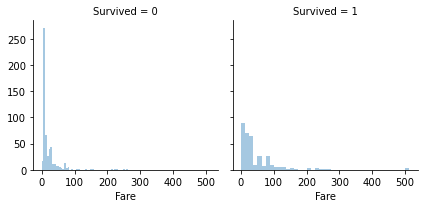

In [39]:
#船票影響
g = sns.FacetGrid(train, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)

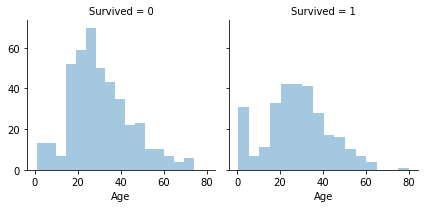

In [40]:
#年紀影響
g = sns.FacetGrid(train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

<AxesSubplot:xlabel='A16', ylabel='count'>

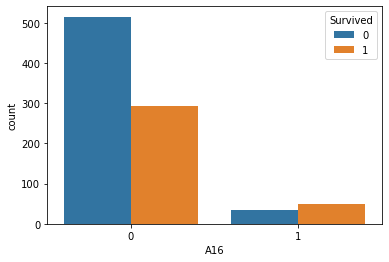

In [48]:
sns.countplot(train['A16'], hue=train['Survived'])

In [41]:
#以下為分為存活與否進行做圖
train_survive = train[train.Survived == 1]
train_dead = train[train.Survived == 0]

In [42]:
def plot_kde(fig, ncols, nrows, mypos, title, feature, xmin=0, xmax=None):
    ax = fig.add_subplot(ncols, nrows, mypos)
    train_survive[feature].plot.kde(ax=ax, color='g')
    train_dead[feature].plot.kde(ax=ax, color='r')
    ax.set_title(title)
    ax.set_xlim(xmin, xmax)

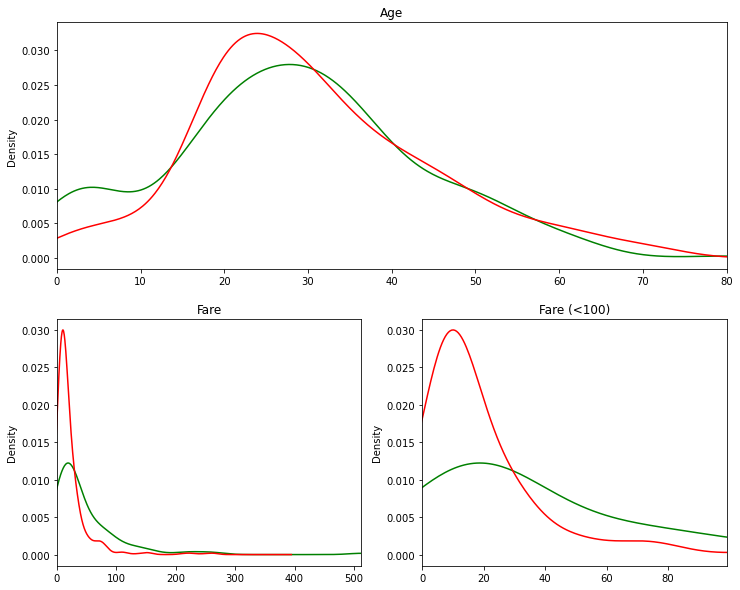

In [43]:
fig = plt.figure(figsize=(12, 10))

plot_kde(fig, 2, 1, 1, 'Age', 'Age', xmax=train.Age.max())
plot_kde(fig, 2, 2, 3, 'Fare', 'Fare', xmax=train.Fare.max())
plot_kde(fig, 2, 2, 4, 'Fare (<100)', 'Fare', xmax=99)

In [30]:
#加入年紀小於16歲欄位
train['A16'] = train['Age'].apply(lambda x: 1 if x < 16 else 0)
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Code,Cnum,Fnum,FYN,InName,F234,Cbcde,A16
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0,ZZ,0,0,M,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1,B,0,0,G,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,1,ZZ,3,1,J,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0,C,0,0,B,0,1,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0,ZZ,0,0,D,0,0,0


Fare        
Survived      0       1
Pclass                 
1         44.75  77.958
2         13.00  21.000
3          8.05   8.517

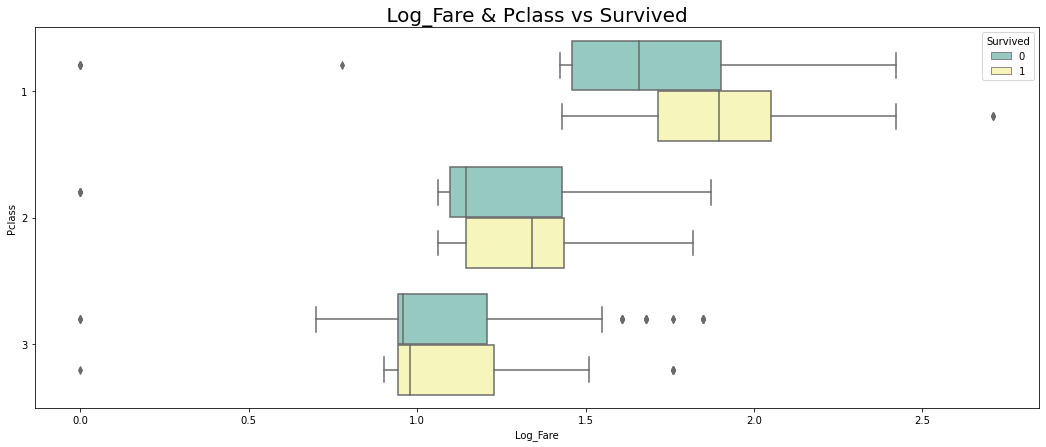

In [89]:
# there is some bugs in log-scale of boxplot. 
# alternatively, we transform x into log10(x) for visualization.
fig, ax = plt.subplots( figsize = (18,7) )
train['Log_Fare'] = (train['Fare']+1).map(lambda x : np.log10(x) if x > 0 else 0)
sns.boxplot(y='Pclass', x='Log_Fare',hue='Survived',data=train, orient='h'
                ,ax=ax,palette="Set3")
ax.set_title(' Log_Fare & Pclass vs Survived ',fontsize = 20)
pd.pivot_table(train,values = ['Fare'], index = ['Pclass'], columns= ['Survived'] ,aggfunc = 'median' ).round(3)

In [ ]:
# 此處作廢，程式碼留存
# 年紀補值處理
# extracted title using name
df_data['Title'] = df_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_data['Title'] = df_data['Title'].replace(['Capt', 'Col', 'Countess', 'Don',
                                               'Dr', 'Dona', 'Jonkheer', 
                                                'Major','Rev','Sir'],'Rare') 
df_data['Title'] = df_data['Title'].replace(['Mlle', 'Ms','Mme'],'Miss')
df_data['Title'] = df_data['Title'].replace(['Lady'],'Mrs')
df_data['Title'] = df_data['Title'].map({"Mr":0, "Rare" : 1, "Master" : 2,"Miss" : 3, "Mrs" : 4 })
Ti = df_data.groupby('Title')['Age'].median()
Ti

In [31]:
#對test加入欄位 倉位 年齡 家人數
test['Cnum'] = test['Cabin'].str.slice(0,1)
test['Cnum'] = test['Cnum'].fillna('ZZ')
test['Cnum'] = test['Cnum'].replace('T','ZZ')
test['Cbcde'] = test['Cnum'].apply(lambda x: 1 if x in ['B','C','D','E'] else 0)

test['Sex_Code'] = test['Sex'].map({'female' : 1, 'male' : 0}).astype('int')

test['Fnum'] = test['SibSp'] + test['Parch']
test['FYN'] = test['Fnum'].apply(lambda x: min(x,1))
test['F234'] = test['Fnum'].apply(lambda x: 1 if x in [2,3,4] else 0)

test['A16'] = test['Age'].apply(lambda x: 1 if x < 16 else 0)

In [48]:
# 程式碼作廢，留存
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute
dataset = KNN(k=3).complete(train.Age)

ModuleNotFoundError: No module named 'fancyimpute'

In [78]:
### 以下開始進行建模
# 只使用性別與艙等的隨機森林
# Inputs set and labels
X = train.drop(labels=['Survived','PassengerId'],axis=1)
Y = train['Survived']

In [81]:
# Show Baseline
Base = ['Sex_Code','Pclass']
Base_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
Base_Model.fit(X[Base], Y)
print('Base oob score :%.5f' %(Base_Model.oob_score_))

Base oob score :0.73176


In [86]:
# submission if you want
# submits
X_Submit = test.drop(labels=['PassengerId'],axis=1)

Base_pred = Base_Model.predict(X_Submit[Base])

submit = pd.DataFrame({"PassengerId": test['PassengerId'],
                      "Survived":Base_pred.astype(int)})
submit.to_csv("submit_Base.csv",index=False)

In [32]:
### 以下開始進行建模
# 使用各項變數的隨機森林

X = train.drop(labels=['Survived','PassengerId'],axis=1)
Y = train['Survived']

# Show Baseline
Base = ['Sex_Code','Pclass','Cbcde','F234','A16']
Base_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
Base_Model.fit(X[Base], Y)
print('Base oob score :%.5f' %(Base_Model.oob_score_))

Base oob score :0.79574


In [33]:
# 第二次提交
# submission if you want
# submits
X_Submit = test.drop(labels=['PassengerId'],axis=1)

Base_pred = Base_Model.predict(X_Submit[Base])

submit = pd.DataFrame({"PassengerId": test['PassengerId'],
                      "Survived":Base_pred.astype(int)})
submit.to_csv("submit_forest2.csv",index=False)

In [39]:
### 以下開始進行建模
# 使用各項變數的隨機森林，且放寬為原始變數

X = train.drop(labels=['Survived','PassengerId'],axis=1)
Y = train['Survived']

# Show Baseline
Base = ['Sex_Code','Pclass','Cbcde','Fnum','A16']
Base_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
Base_Model.fit(X[Base], Y)
print('Base oob score :%.5f' %(Base_Model.oob_score_))

Base oob score :0.82267


In [40]:
# 第三次提交：達到29%
# submission if you want
# submits
X_Submit = test.drop(labels=['PassengerId'],axis=1)

Base_pred = Base_Model.predict(X_Submit[Base])

submit = pd.DataFrame({"PassengerId": test['PassengerId'],
                      "Survived":Base_pred.astype(int)})
submit.to_csv("submit_forest3.csv",index=False)

In [47]:
plot_tree(rf.estimators_[0])

NameError: name 'plot_tree' is not defined

In [35]:
#fig, ax = plt.subplots( figsize = (18,7) )
#sns.boxplot(y='Survived', x='Log_Fare',data=train, orient='h'
#                ,ax=ax,palette="Set3")
#ax.set_title(' Log_Fare vs Survived ',fontsize = 20)